<a href="https://colab.research.google.com/github/ptsnbkht/DI-Bootcamp/blob/main/Week3Day4dailychallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

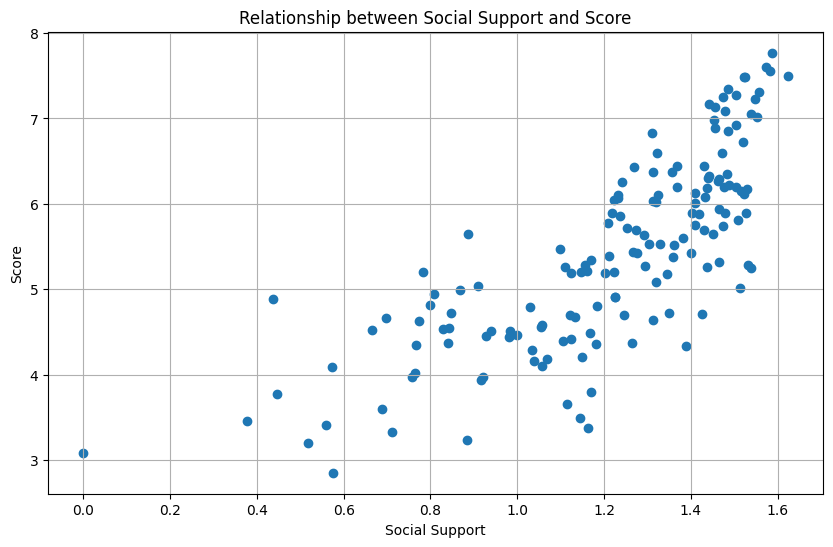

<ipython-input-1-a9810adec0d6>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(region_data['Country or region'], rotation=90, ha='right')


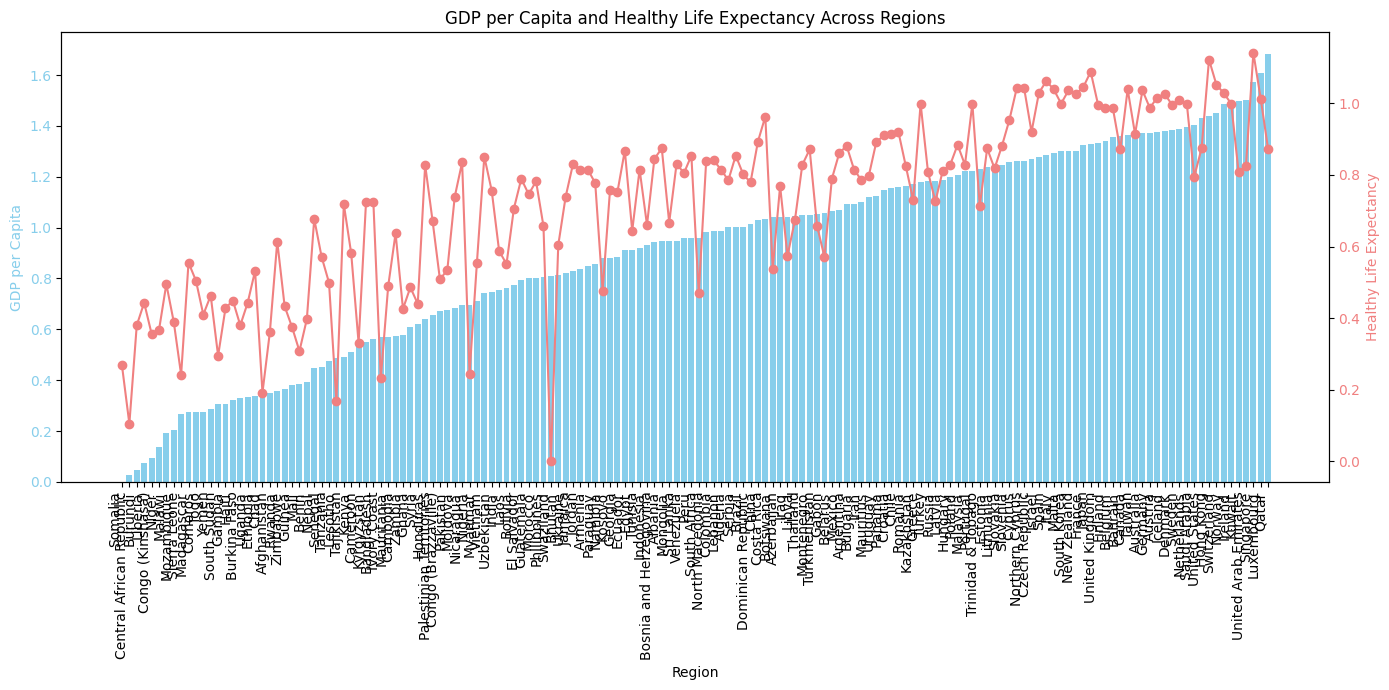

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('2019.csv')

# Address missing values (example: fill with mean)
for col in df.columns:
  if df[col].isnull().any():
    if df[col].dtype in ['float64', 'int64']:
      df[col] = df[col].fillna(df[col].mean())

# Adjust data types if necessary (converting a column to numeric)
# Ensure the columns used for plotting are numeric
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
df['Social support'] = pd.to_numeric(df['Social support'], errors='coerce')
df['GDP per capita'] = pd.to_numeric(df['GDP per capita'], errors='coerce')
df['Healthy life expectancy'] = pd.to_numeric(df['Healthy life expectancy'], errors='coerce')


df.dropna(subset=['Score', 'Social support', 'GDP per capita', 'Healthy life expectancy'], inplace=True)


# Scatter plot: Social_support vs Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Social support'], df['Score'])
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.title('Relationship between Social Support and Score')
plt.grid(True)
plt.show()

# Subplot: GDP_per_Capita and Healthy_Life_Expectancy across different regions
fig, ax1 = plt.subplots(figsize=(14, 7))

# Group data by region and calculate the mean for plotting
region_data = df.groupby('Country or region')[['GDP per capita', 'Healthy life expectancy']].mean().reset_index()

# Sort by GDP per capita for better visualization
region_data = region_data.sort_values('GDP per capita')

# Bar plot for GDP_per_Capita on the first axes
ax1.bar(region_data['Country or region'], region_data['GDP per capita'], color='skyblue', label='GDP per Capita')
ax1.set_xlabel('Region')
ax1.set_ylabel('GDP per Capita', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(region_data['Country or region'], rotation=90, ha='right')

# Create a second axes for the line plot
ax2 = ax1.twinx()
ax2.plot(region_data['Country or region'], region_data['Healthy life expectancy'], color='lightcoral', marker='o', label='Healthy Life Expectancy')
ax2.set_ylabel('Healthy Life Expectancy', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')

plt.title('GDP per Capita and Healthy Life Expectancy Across Regions')
fig.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()
